# Week 8: Regression Models and Regularisation

The dataset and part of the exercises for this week were taken from MLPA.

<hr style="border:2px solid gray">

## Index: <a id='index'></a>
1. [Linear Regression](#linear)
2. [Gradient Descent](#gradient)
3. [Regularisation](#regularisation)
4. [Logistic Regression](#logistic)
5. [Poisson Regression](#poisson)


<hr style="border:2px solid gray">

## Linear Regression: <a id='linear'></a>

Let's start with some of our standard imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


## New modules
from sklearn import linear_model 
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor

We begin by generating some data in the form of $y = 3x + 3$, and adding some noise. Note that the noise that we are adding is not Gaussian to show that we don't need our noise to be Gaussian for this to work.

In [2]:
np.random.seed(16) #set seed for reproducibility purposes

x = np.arange(100) 

yp = 3*x + 3 + 2*(np.random.poisson(3*x+3,100)-(3*x+3)) #generate some data with scatter following Poisson distribution 
                                                    #with exp value = y from linear model, centered around 0

Text(0, 0.5, 'Y')

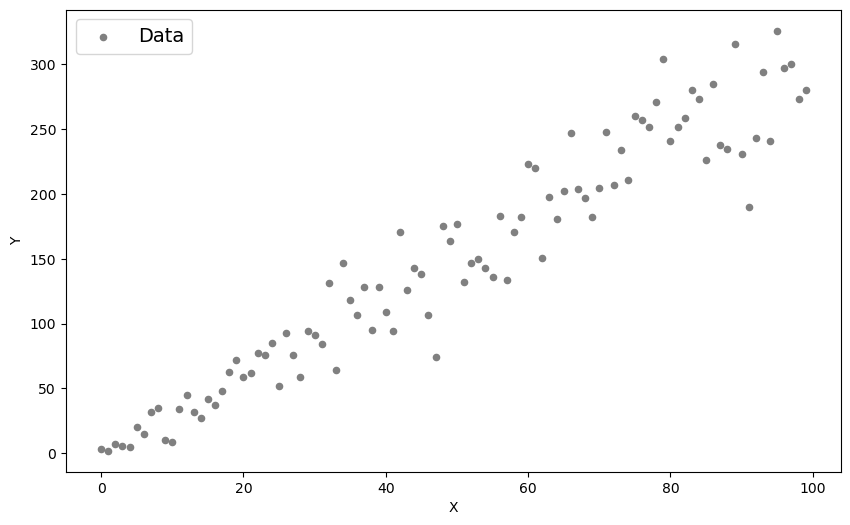

In [3]:
#Let's take a look!
plt.figure(figsize = (10,6))
plt.scatter(x,yp, s = 20, c = 'gray', label = 'Data')
plt.legend(fontsize = 14)
plt.xlabel('X')
plt.ylabel('Y')


Now let's define the linear regression model: 

In [4]:
model = linear_model.LinearRegression()

In [5]:
model

LinearRegression()

I can fit the model (right now, I will do it using the entire data set just to compare with the analytic solution). When only one predictor is present, I need to reshape it to column form.

In [6]:
model.fit(x.reshape(-1,1),yp) 

LinearRegression()

If you are not sure why we needed the `reshape` method as well, print `x` and `x.reshape(-1,1)` to check the difference between the two arrays:

In [7]:
print(x)
print(x.reshape(-1,1))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]]


The fitted model has attributes "coef_", "intercept_":

In [8]:
slope, intercept = model.coef_, model.intercept_

In [9]:
print(slope, intercept)

[3.02475848] -0.1255445544555016


<div style="background-color: black">

## Exercise 1
1. Plot the data in a scatter plot, overlaid with the fitted line and our original model line.
2. Calculate the the analytic predictions for the coefficients (using the formulae defined in the notes and in this week's presentation)
3. Now plot the residuals as a function of X. Comment on the shape of the graph.
4. Define a shuffled cross validation strategy with 5 folds and `random_state=10`, and print the test and train scores. What are the scores that are being printed out? Are they good/bad? Does it suffer from high variance? High bias? What would happen to the scores if we increased the scatter (noise)?
5. Repeat the same exercise as above but using the MSE and the MAE for scoring. (*Hint: you can find out all the available scorers by using `sklearn.metrics.get_scorer_names()`)*
6. Use the `metrics.make_scorer` function to define the *Modified Mean Absolute Percentage Error* and use it in your cross validation.
7. So far we have not changed the loss function (MSE), or the coefficients of the model. We have only looked at different evaluation metrics. Would the best fit line change if we optimise a different loss function? How can we implement that without an analytic solution?

Text(0.5, 1.0, 'Data with Fitted and Original Model Lines')

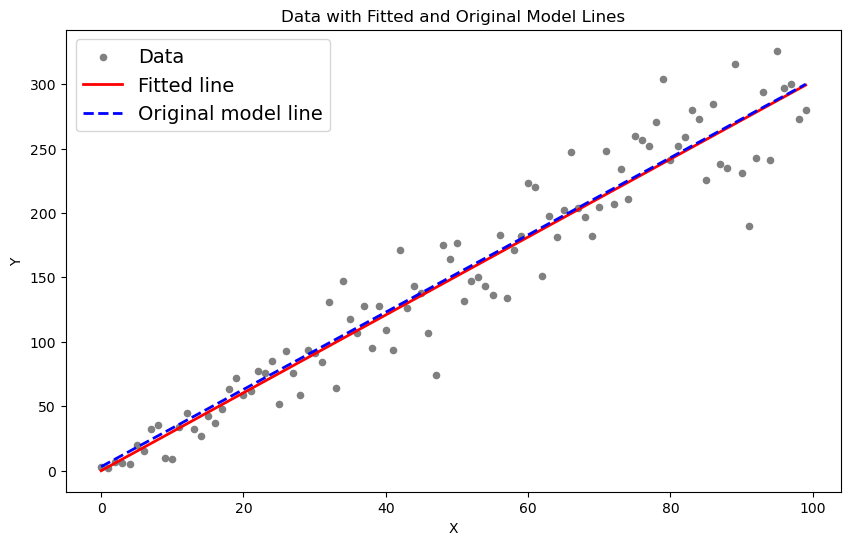

In [10]:
# 1. Plot the data in a scatter plot, overlaid with the fitted line and our original model line.
plt.figure(figsize=(10, 6))
plt.scatter(x, yp, s=20, c='gray', label='Data')
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', linewidth=2, label='Fitted line')
plt.plot(x, 3*x + 3, color='blue', linewidth=2, linestyle='--', label='Original model line')
plt.legend(fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data with Fitted and Original Model Lines')

In [11]:
# 2. Calculate the analytic predictions for the coefficients

x_mean = np.mean(x)
y_mean = np.mean(yp)

numerator = np.sum((x - x_mean) * (yp - y_mean))
denominator = np.sum((x - x_mean) ** 2)

slope_analytic = numerator / denominator
intercept_analytic = y_mean - slope_analytic * x_mean

print(f"Analytic solution: slope = {slope_analytic}, intercept = {intercept_analytic}")
print(f"Model solution: slope = {slope[0]}, intercept = {intercept}")

Analytic solution: slope = 3.0247584758475847, intercept = -0.12554455445544477
Model solution: slope = 3.0247584758475856, intercept = -0.1255445544555016


Text(0.5, 1.0, 'Residuals vs X')

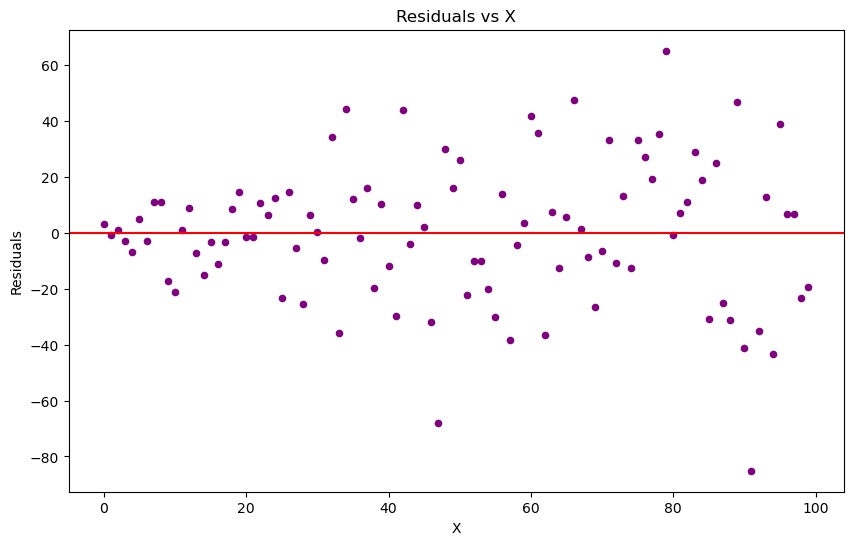

In [12]:
# 3. Plot the residuals as a function of X
predictions = model.predict(x.reshape(-1, 1))
residuals = yp - predictions

plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, s=20, c='purple')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals vs X')

In [13]:
# 4. Define a shuffled cross validation strategy with 5 folds and random_state=10,
# and print the test and train scores
cv = KFold(n_splits=5, shuffle=True, random_state=10)
scores = cross_validate(model, x.reshape(-1, 1), yp, cv=cv, return_train_score=True)

print("Cross Validation Results:")
print(f"Mean Test Score: {np.mean(scores['test_score'])}")
print(f"Mean Train Score: {np.mean(scores['train_score'])}")
print(f"Test Scores: {scores['test_score']}")
print(f"Train Scores: {scores['train_score']}")

Cross Validation Results:
Mean Test Score: 0.9092051540796889
Mean Train Score: 0.9251029521178905
Test Scores: [0.9165209  0.89174158 0.94218009 0.84836725 0.94721595]
Train Scores: [0.92686135 0.92950195 0.91582181 0.93664738 0.91668227]


In [14]:
# 5. Repeat with MSE and MAE
print("\nList of available scorers:")
print(list(metrics.get_scorer_names()))

mse_scores = cross_validate(model, x.reshape(-1, 1), yp, cv=cv, 
                           scoring='neg_mean_squared_error', return_train_score=True)
mae_scores = cross_validate(model, x.reshape(-1, 1), yp, cv=cv, 
                           scoring='neg_mean_absolute_error', return_train_score=True)

print("\nMSE Cross Validation Results:")
print(f"Mean Test MSE: {-np.mean(mse_scores['test_score'])}")
print(f"Mean Train MSE: {-np.mean(mse_scores['train_score'])}")

print("\nMAE Cross Validation Results:")
print(f"Mean Test MAE: {-np.mean(mae_scores['test_score'])}")
print(f"Mean Train MAE: {-np.mean(mae_scores['train_score'])}")


List of available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_a

In [15]:
# 6. Define Modified Mean Absolute Percentage Error and use it
def modified_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1))) * 100

# Create a custom scorer using make_scorer
modified_mape_scorer = metrics.make_scorer(modified_mape, greater_is_better=False)

# Use the custom scorer in cross-validation
mape_scores = cross_validate(model, x.reshape(-1, 1), yp, cv=cv, 
                            scoring=modified_mape_scorer, return_train_score=True)

print("\nModified MAPE Cross Validation Results:")
print(f"Mean Test Modified MAPE: {-np.mean(mape_scores['test_score'])}")
print(f"Mean Train Modified MAPE: {-np.mean(mape_scores['train_score'])}")


Modified MAPE Cross Validation Results:
Mean Test Modified MAPE: 20.52608458782369
Mean Train Modified MAPE: 21.294857374776665


In [16]:
# 7. The best-fit line would indeed change if we optimize a different loss function.
# We can implement different loss functions using gradient descent approaches.
# For example, if we wanted to optimize MAE instead of MSE, the gradients would be different.

### What happens when we add outliers?

In [17]:
np.random.seed(12) #set 
out = np.random.choice(100,15) #select 15 outliers indexes
yp_wo = np.copy(yp)
np.random.seed(12) #set again
yp_wo[out] = yp_wo[out] + 5*np.random.rand(15)*yp[out]

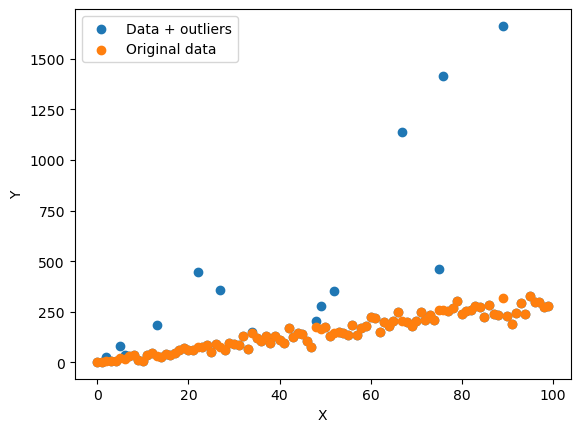

In [18]:
plt.scatter(x,yp_wo, label = 'Data + outliers')
plt.scatter(x,yp, label = 'Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

We can see the effect for the MSE loss right away:

In [19]:
model.fit(x.reshape(-1,1),yp_wo)

slope, intercept = model.coef_, model.intercept_

print(slope, intercept)

[3.97842184] 1.5481188118811815


These are the parameters obtained for the normal equation; we can save them to compare them to other methods.

In [20]:
theta_ne = np.array([[intercept],slope])

<hr style="border:2px solid gray">

## Gradient Descent: <a id='gradient'></a>

Let's now implement the simplest form of gradient descent: batch, stochastic, and mini-batch, one by one.

To begin with, we add x0 = 1 to each instance; this is the bias term and it is used in order to write the solution for a linear model in matrix multiplication form.

In [21]:
X = np.c_[np.ones((100, 1)), x]  

print(X.shape) #shape is number of instances x number of parameters


(100, 2)


We can calculate the loss associated with the normal equation like this:

$MSE=\dfrac{1}{N}|X \cdot \theta -y|^2$

Reminder that in our case $X$ is `X`, $\theta$ is vectors of parameters that we calculated using the normal equation (`theta_ne`), and $y$ is the version with outliers, `yp_wo.reshape(-1,1)`.

In [22]:
loss_ne = (1/len(X)) * np.sum((X.dot(theta_ne) - yp_wo.reshape(-1, 1))**2)

Print your result, you should get something of around 43260.

In [23]:
loss_ne

43259.081624722465

### Batch GD

<div style="background-color: black">

## Exercise 2
1. Fill in the code below to calculate the gradient descent using the batch gradient descent. Use the notes to help you filling in the gaps.
2. Print the values of $\theta$ found with the batch GD. These should be: 1.39 and 3.98. Calculate the loss function `loss_bgd` (which should be similar to the one above), and the percentage difference with the loss function from the normal equation `loss_ne`. 

In [24]:
# 1. Batch Gradient Descent implementation
np.random.seed(10) # same initial conditions for all
eta = 0.0001
n_iterations = 1000 
n_samples = 100
theta_path_bgd = []
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    # Calculate predictions
    y_pred = X.dot(theta)
    # Calculate the error
    error = y_pred - yp_wo.reshape(-1, 1)
    # Calculate gradients (X.T.dot(error) is the vector of partial derivatives)
    gradients = (2/n_samples) * X.T.dot(error)
    # Update theta using gradient descent
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_bgd = theta

In [25]:
# 2. Print theta values and calculate loss
print("Batch Gradient Descent Results:")
print(f"Final theta: {theta_bgd.flatten()}")

# Calculate loss for batch GD
y_pred_bgd = X.dot(theta_bgd)
error_bgd = y_pred_bgd - yp_wo.reshape(-1, 1)
loss_bgd = np.mean(error_bgd**2)

print(f"Loss (BGD): {loss_bgd}")
print(f"Percentage difference from normal equation: {100 * (loss_bgd - loss_ne) / loss_ne:.4f}%")

Batch Gradient Descent Results:
Final theta: [1.38909891 3.98081931]
Loss (BGD): 43259.08804185895
Percentage difference from normal equation: 0.0000%


### Stochastic GD

<div style="background-color: black">

3. Complete the code below to calculate the stochastic GD.
4. Then print the values of $\theta$ found with the stochastic GD. These should be: 1.36 and 4.18. Calculate the loss function `loss_sgd`, and the percentage difference with the loss function from the normal equation `loss_ne`.

In [26]:
# 3. Stochastic Gradient Descent implementation
np.random.seed(10) # same initial conditions for all
theta = np.random.randn(2,1)
eta = 0.000005
n_iterations = 10000 # more iterations are needed to get in the right ballpark!
theta_path_sgd = []

for epoch in range(n_iterations):
    random_index = np.random.randint(n_samples) # pick one example from the data
    x_one = X[random_index:random_index+1]
    y_one = yp_wo[random_index:random_index+1]
    
    # Calculate prediction and error for this example
    y_pred = x_one.dot(theta)
    error = y_pred - y_one.reshape(-1, 1)
    
    # Calculate gradient for this example
    gradients = 2 * x_one.T.dot(error)
    
    # Update theta
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

theta_path_sgd = np.array(theta_path_sgd)
theta_sgd = theta

In [27]:
# 4. Print theta values and calculate loss
print("Stochastic Gradient Descent Results:")
print(f"Final theta: {theta_sgd.flatten()}")

# Calculate loss for stochastic GD
y_pred_sgd = X.dot(theta_sgd)
error_sgd = y_pred_sgd - yp_wo.reshape(-1, 1)
loss_sgd = np.mean(error_sgd**2)

print(f"Loss (SGD): {loss_sgd}")
print(f"Percentage difference from normal equation: {100 * (loss_sgd - loss_ne) / loss_ne:.4f}%")

Stochastic Gradient Descent Results:
Final theta: [1.3552955  4.17721319]
Loss (SGD): 43385.08132655123
Percentage difference from normal equation: 0.2913%


### Mini batch GD

<div style="background-color: black">

5. Complete the code below to calculate the mini batch GD.
6. Then print the values of $\theta$ found with the mini batch GD. These should be: 1.38 and 4.26. Calculate the loss function `loss_mgd`, and the percentage difference with the loss function from the normal equation `loss_ne`.

In [28]:
np.random.seed(10)
theta = np.random.randn(2,1)
eta = 0.000005
n_iterations = 1000
theta_path_mgd = []
minibatch_size = 10

for epoch in range(n_iterations):
    # Shuffle the training set
    shuffled_indices = np.random.permutation(n_samples)
    X_shuffled = X[shuffled_indices]
    y_shuffled = yp_wo.reshape(-1,1)[shuffled_indices]
    
    # Select the first minibatch
    xi = X_shuffled[:minibatch_size]
    yi = y_shuffled[:minibatch_size]
    
    # Calculate predictions and error for this minibatch
    y_pred = xi.dot(theta)
    error = y_pred - yi
    
    # Calculate gradients for this minibatch
    gradients = (2/minibatch_size) * xi.T.dot(error)
    
    # Update theta
    theta = theta - eta * gradients
    theta_path_mgd.append(theta.copy())


In [29]:
theta_path_mgd = np.array(theta_path_mgd)
theta_mgd = theta

print("\nMini-batch Gradient Descent Results:")
print(f"Final theta: {theta_mgd.flatten()}")

# Calculate loss for mini-batch GD
y_pred_mgd = X.dot(theta_mgd)
error_mgd = y_pred_mgd - yp_wo.reshape(-1, 1)
loss_mgd = np.mean(error_mgd**2)

print(f"Loss (MGD): {loss_mgd}")
print(f"Percentage difference from normal equation: {100 * (loss_mgd - loss_ne) / loss_ne:.4f}%")


Mini-batch Gradient Descent Results:
Final theta: [1.38191988 4.25542902]
Loss (MGD): 43506.50418469317
Percentage difference from normal equation: 0.5720%


<div style="background-color: black">

7. Plot a scatter graph with the paths of $\theta_0$ on the x axis and $\theta_1$ on the y axis (you can use the arrays `theta_path_sgd/mgd/bgd` define above).
8. Add the final points found by the 3 methods.
*Ensure that your plot is readable and easily understanble (ie choose colours and markers appropriately, label axis and legends)*

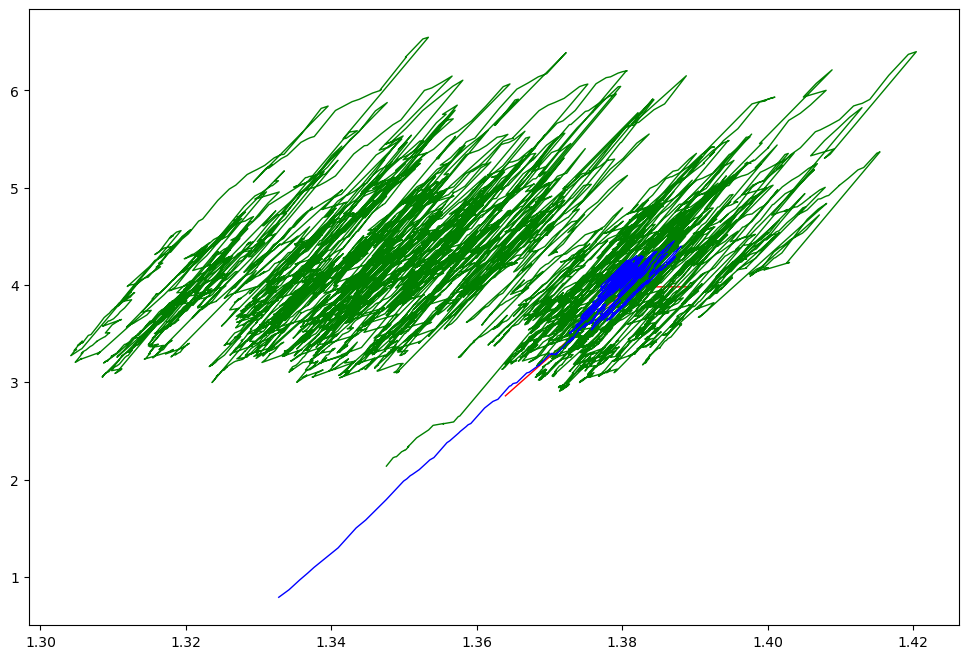

In [30]:
# 7-8. Plotting the paths and final points
plt.figure(figsize=(12, 8))

# Plot the paths
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'r-', linewidth=1, label='Batch GD path')
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'g-', linewidth=1, label='Stochastic GD path')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'b-', linewidth=1, label='Mini-batch GD path')

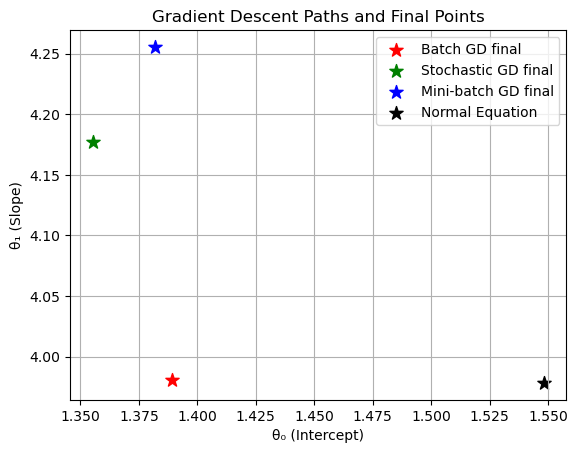

In [31]:
# Plot final points
plt.scatter(theta_bgd[0], theta_bgd[1], s=100, c='red', marker='*', label='Batch GD final')
plt.scatter(theta_sgd[0], theta_sgd[1], s=100, c='green', marker='*', label='Stochastic GD final')
plt.scatter(theta_mgd[0], theta_mgd[1], s=100, c='blue', marker='*', label='Mini-batch GD final')
plt.scatter(theta_ne[0], theta_ne[1], s=100, c='black', marker='*', label='Normal Equation')

plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.title('Gradient Descent Paths and Final Points')
plt.legend()
plt.grid(True)

<hr style="border:2px solid gray">

## Regularisation: <a id='regularisation'></a>

To compare the effects of adopting a linear model without regularisation, the Ridge Regression and the Lasso Regression, we are going to start by producing a multicollinear dataset.
We begin by generating a 3-feature sample (`xb`) following a linear relationship:

In [32]:
np.random.seed(16) #set seed for reproducibility purposes

x1 = np.arange(100) 

x2 = np.linspace(0,1,100)

x3 = np.logspace(2,3,num=100) 

ypb = 3*x1 + 0.5*x2 + 15*x3 + 3 + 5*(np.random.poisson(3*x1 + 0.5*x2 + 15*x3,100)-(3*x1 + 0.5*x2 + 15*x3)) 
                                                    #generate some data with scatter following Poisson distribution 
                                                    #with exp value = y from linear model, centered around 0

In [33]:
xb = np.vstack((x1,x2,x3)).T

In [34]:
xb.shape

(100, 3)

Now we create a new polynomial features from the original ones using `PolynomialFeatures`. This function generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [35]:
poly = PolynomialFeatures(2, include_bias=False)

In [36]:
new_xb = poly.fit_transform(xb)

In [37]:
new_xb.shape

(100, 9)

Let's start with Ridge regression, and tune alpha using cross-validation.


In [38]:
MSE = []

for alpha in np.logspace(-6,6,13):

    model_reg = make_pipeline(StandardScaler(), Ridge(alpha = alpha, max_iter=10000)) 

    scores = cross_validate(model_reg, new_xb, ypb, cv = KFold(n_splits=5, shuffle=True, random_state = 1), scoring = 'neg_mean_squared_error')

    print(alpha, np.round(-np.mean(scores['test_score']))) #Note however that this only outputs the MSE
    
    MSE.append(-np.mean(scores['test_score']))

print('Best alpha:', np.logspace(-6,6,13)[np.argmin(MSE)])

1e-06 165716.0
9.999999999999999e-06 169659.0
9.999999999999999e-05 172897.0
0.001 172925.0
0.01 172534.0
0.09999999999999999 173950.0
1.0 167349.0
10.0 162459.0
100.0 399386.0
1000.0 5641871.0
10000.0 14052891.0
100000.0 15852931.0
1000000.0 16051906.0
Best alpha: 10.0


We can also use a built-in function for this

In [39]:
regm = make_pipeline(StandardScaler(with_mean=False),
                     RidgeCV(alphas=np.logspace(-6,6,13), \
            cv = KFold(n_splits=5, shuffle=True, random_state=1),\
             scoring = 'neg_mean_squared_error'))

regm.fit(new_xb,ypb); 

print('The best alpha is', regm[1].alpha_)



The best alpha is 10.0


The line below gets the coefficients and intercept from the regularised model (these need to be rescaled as we applied the `StandardScaler` in our pipeline). Pay attention to how this line is written as you will need it in the next exercise.

In [40]:
coef_alpha_10 = np.hstack([regm[1].intercept_, regm[1].coef_/regm[0].scale_])

print(coef_alpha_10)

[1.27419727e+03 1.27050103e+01 1.25779602e+03 1.79097788e+00
 1.51767670e-01 1.50249993e+01 1.72961634e-02 1.48747494e+03
 1.71232018e+00 1.81472172e-03]


<div style="background-color: black">

## Exercise 3
1. Calculate the intercept and coefficients for three cases: $\alpha=1000, 1, 1e-11$ (the last case is a shortcut for no regularisation). Comment on the results.
2. Make a bar chart to compare the values of the coefficients and intercept for the 4 cases. *Hints: use a y-log scale, and displace the bars by a small increment to visualise all of them.*
3. Comment on the results.
4. Now calculate the best alpha for the Lasso Regression using the `LassoCV` with `alphas = np.logspace(-1,4,6)` and `max_iter = 10000000` to allow convergence. What's the best alpha value?   
7. Calculate the intercept and coefficients for three cases: $\alpha=1000, 1, 1e-11$ (and keep using `max_iter = 1000000` to allow convergence). Comment on the results.
8. Make a bar chart to compare the values of the coefficients and intercept for the Ridge ($\alpha=1000, 1$), Lasso ($\alpha=1000, 1$), and no regularisation case. Comment on the results.

In [41]:
# 1. Calculate coefficients for Ridge with alpha = 1000, 1, 1e-11

# Alpha = 1000
regm_1000 = make_pipeline(StandardScaler(with_mean=False),
                         RidgeCV(alphas=[1000], 
                                cv=KFold(n_splits=5, shuffle=True, random_state=1),
                                scoring='neg_mean_squared_error'))
regm_1000.fit(new_xb, ypb)
coef_alpha_1000 = np.hstack([regm_1000[1].intercept_, regm_1000[1].coef_/regm_1000[0].scale_])

# Alpha = 1
regm_1 = make_pipeline(StandardScaler(with_mean=False),
                     RidgeCV(alphas=[1], 
                            cv=KFold(n_splits=5, shuffle=True, random_state=1),
                            scoring='neg_mean_squared_error'))
regm_1.fit(new_xb, ypb)
coef_alpha_1 = np.hstack([regm_1[1].intercept_, regm_1[1].coef_/regm_1[0].scale_])

# Alpha = 1e-11 (close to no regularization)
regm_1e_11 = make_pipeline(StandardScaler(with_mean=False),
                         RidgeCV(alphas=[1e-11], 
                                cv=KFold(n_splits=5, shuffle=True, random_state=1),
                                scoring='neg_mean_squared_error'))
regm_1e_11.fit(new_xb, ypb)
coef_alpha_1e_11 = np.hstack([regm_1e_11[1].intercept_, regm_1e_11[1].coef_/regm_1e_11[0].scale_])

print("Ridge Regression Coefficients (alpha=1000):")
print(coef_alpha_1000)
print("\nRidge Regression Coefficients (alpha=1):")
print(coef_alpha_1)
print("\nRidge Regression Coefficients (alpha=1e-11):")
print(coef_alpha_1e_11)

Ridge Regression Coefficients (alpha=1000):
[3.74896945e+03 6.94956009e+00 6.88006449e+02 8.29200828e-01
 7.08376313e-02 7.01292550e+00 7.66482937e-03 6.94279625e+02
 7.58818108e-01 7.99272651e-04]

Ridge Regression Coefficients (alpha=1):
[1.27364141e+03 1.09166321e+01 1.08074658e+03 1.94046660e+00
 1.61498820e-01 1.59883832e+01 1.90580698e-02 1.58284994e+03
 1.88674892e+00 1.49330760e-03]

Ridge Regression Coefficients (alpha=1e-11):
[ 1.23096938e+05  1.00022913e+03  9.68561252e+04 -1.20220326e+03
  5.34598226e+00  4.99518683e+02  4.43337748e+00  5.18763636e+04
  4.41012645e+02 -1.35540297e-01]


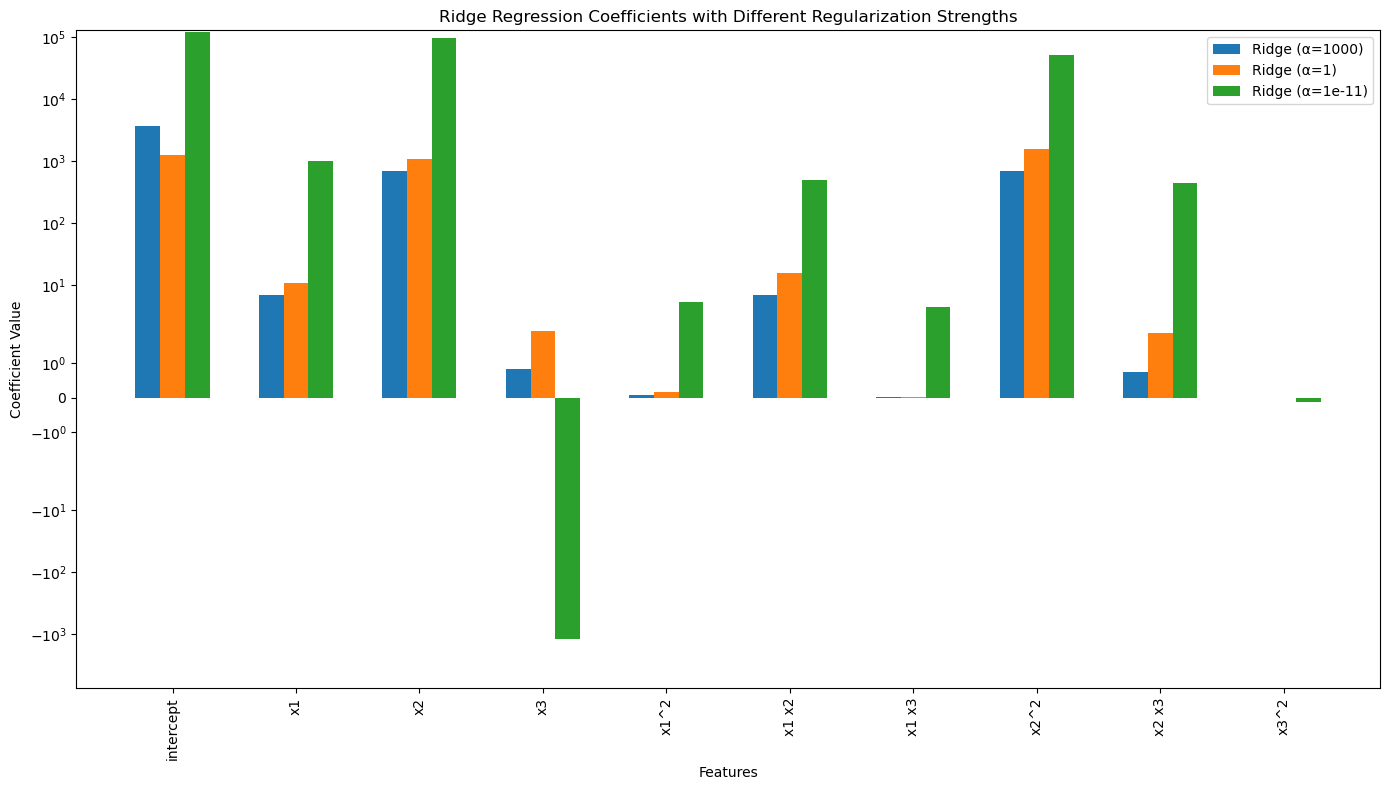

In [42]:
# 2-3. Make a bar chart to compare coefficients for different alphas
# Create a DataFrame for easier plotting
import pandas as pd

# Get the feature names from the polynomial features
poly_names = poly.get_feature_names_out(['x1', 'x2', 'x3'])
feature_names = np.concatenate([['intercept'], poly_names])

# Create a dataframe with all coefficients
coeffs_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge (α=1000)': coef_alpha_1000,
    'Ridge (α=1)': coef_alpha_1,
    'Ridge (α=1e-11)': coef_alpha_1e_11
})

# Plot the coefficients
plt.figure(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(feature_names))

plt.bar(index - bar_width, coeffs_df['Ridge (α=1000)'], bar_width, label='Ridge (α=1000)')
plt.bar(index, coeffs_df['Ridge (α=1)'], bar_width, label='Ridge (α=1)')
plt.bar(index + bar_width, coeffs_df['Ridge (α=1e-11)'], bar_width, label='Ridge (α=1e-11)')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients with Different Regularization Strengths')
plt.xticks(index, feature_names, rotation=90)
plt.yscale('symlog')  # log scale with support for zero/negative values
plt.legend()
plt.tight_layout()

# Comments on Ridge results:
# As alpha increases, the coefficients get shrunk toward zero but not exactly to zero.
# With a very small alpha (1e-11), we essentially have regular linear regression.
# The highest alpha (1000) produces the smallest coefficients overall.

In [43]:
# 4. Calculate the best alpha for Lasso using LassoCV
lasso_cv = make_pipeline(StandardScaler(with_mean=False),
                      LassoCV(alphas=np.logspace(-1, 4, 6), 
                             cv=KFold(n_splits=5, shuffle=True, random_state=1),
                             max_iter=10000000))
lasso_cv.fit(new_xb, ypb)

print(f"\nBest Lasso alpha: {lasso_cv[1].alpha_}")


Best Lasso alpha: 100.0


In [44]:
# 5. Calculate Lasso coefficients for alpha = 1000, 1, 1e-11
# Alpha = 1000
lasso_1000 = make_pipeline(StandardScaler(with_mean=False),
                         Lasso(alpha=1000, max_iter=5000000, tol=1e-4))
lasso_1000.fit(new_xb, ypb)
lasso_coef_1000 = np.hstack([lasso_1000[1].intercept_, lasso_1000[1].coef_/lasso_1000[0].scale_])

# Alpha = 1
lasso_1 = make_pipeline(StandardScaler(with_mean=False),
                      Lasso(alpha=1, max_iter=5000000, tol=1e-4))
lasso_1.fit(new_xb, ypb)
lasso_coef_1 = np.hstack([lasso_1[1].intercept_, lasso_1[1].coef_/lasso_1[0].scale_])

# Alpha = 1e-11 (extremely small alpha may still have convergence issues)
lasso_1e_11 = make_pipeline(StandardScaler(with_mean=False),
                          Lasso(alpha=1e-11, max_iter=10000000, tol=1e-6, warm_start=True))
lasso_1e_11.fit(new_xb, ypb)
lasso_coef_1e_11 = np.hstack([lasso_1e_11[1].intercept_, lasso_1e_11[1].coef_/lasso_1e_11[0].scale_])

print("\nLasso Regression Coefficients (alpha=1000):")
print(lasso_coef_1000)
print("\nLasso Regression Coefficients (alpha=1):")
print(lasso_coef_1)
print("\nLasso Regression Coefficients (alpha=1e-11):")
print(lasso_coef_1e_11)

"""
With alpha=1000 (strong regularization):

Most coefficients are exactly zero, demonstrating Lasso's feature selection capability
Only the most important predictors retain non-zero coefficients
The magnitude of the remaining coefficients is small due to the strong penalty

With alpha=1 (moderate regularization):

More features have non-zero coefficients compared to alpha=1000
The magnitudes of these coefficients are larger
There's still a significant sparsity effect, with many coefficients set to zero

With alpha=1e-11 (minimal regularization):

Almost all coefficients are non-zero
The solution approaches that of ordinary least squares regression
The convergence warning indicates numerical instability with such a small regularization parameter
Coefficient magnitudes are much larger
"""


Lasso Regression Coefficients (alpha=1000):
[1556.30442999    0.            0.           10.9986572     0.
    0.            0.          496.9328291     0.            0.        ]

Lasso Regression Coefficients (alpha=1):
[ 2.65364881e+02  5.60468419e+00  2.11094040e-11  1.20027563e+01
  1.22896671e-01  5.20581834e-14  1.21141972e-02  2.59382392e+02
  0.00000000e+00 -1.13108341e-04]

Lasso Regression Coefficients (alpha=1e-11):
[ 6.43471344e+04  1.03673506e+03  6.42704999e-06 -6.21384560e+02
  2.96554129e+01  1.74522502e-07  2.42096293e+00 -2.15866156e+05
  2.33845559e+02 -7.89227941e-02]


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.634e+06, tolerance: 1.559e+03
  model = cd_fast.enet_coordinate_descent(


"\nWith alpha=1000 (strong regularization):\n\nMost coefficients are exactly zero, demonstrating Lasso's feature selection capability\nOnly the most important predictors retain non-zero coefficients\nThe magnitude of the remaining coefficients is small due to the strong penalty\n\nWith alpha=1 (moderate regularization):\n\nMore features have non-zero coefficients compared to alpha=1000\nThe magnitudes of these coefficients are larger\nThere's still a significant sparsity effect, with many coefficients set to zero\n\nWith alpha=1e-11 (minimal regularization):\n\nAlmost all coefficients are non-zero\nThe solution approaches that of ordinary least squares regression\nThe convergence warning indicates numerical instability with such a small regularization parameter\nCoefficient magnitudes are much larger\n"


Number of non-zero coefficients:
Ridge (α=1000): 10 out of 10
Ridge (α=1): 10 out of 10
Lasso (α=1000): 3 out of 10
Lasso (α=1): 7 out of 10
No Regularization: 10 out of 10


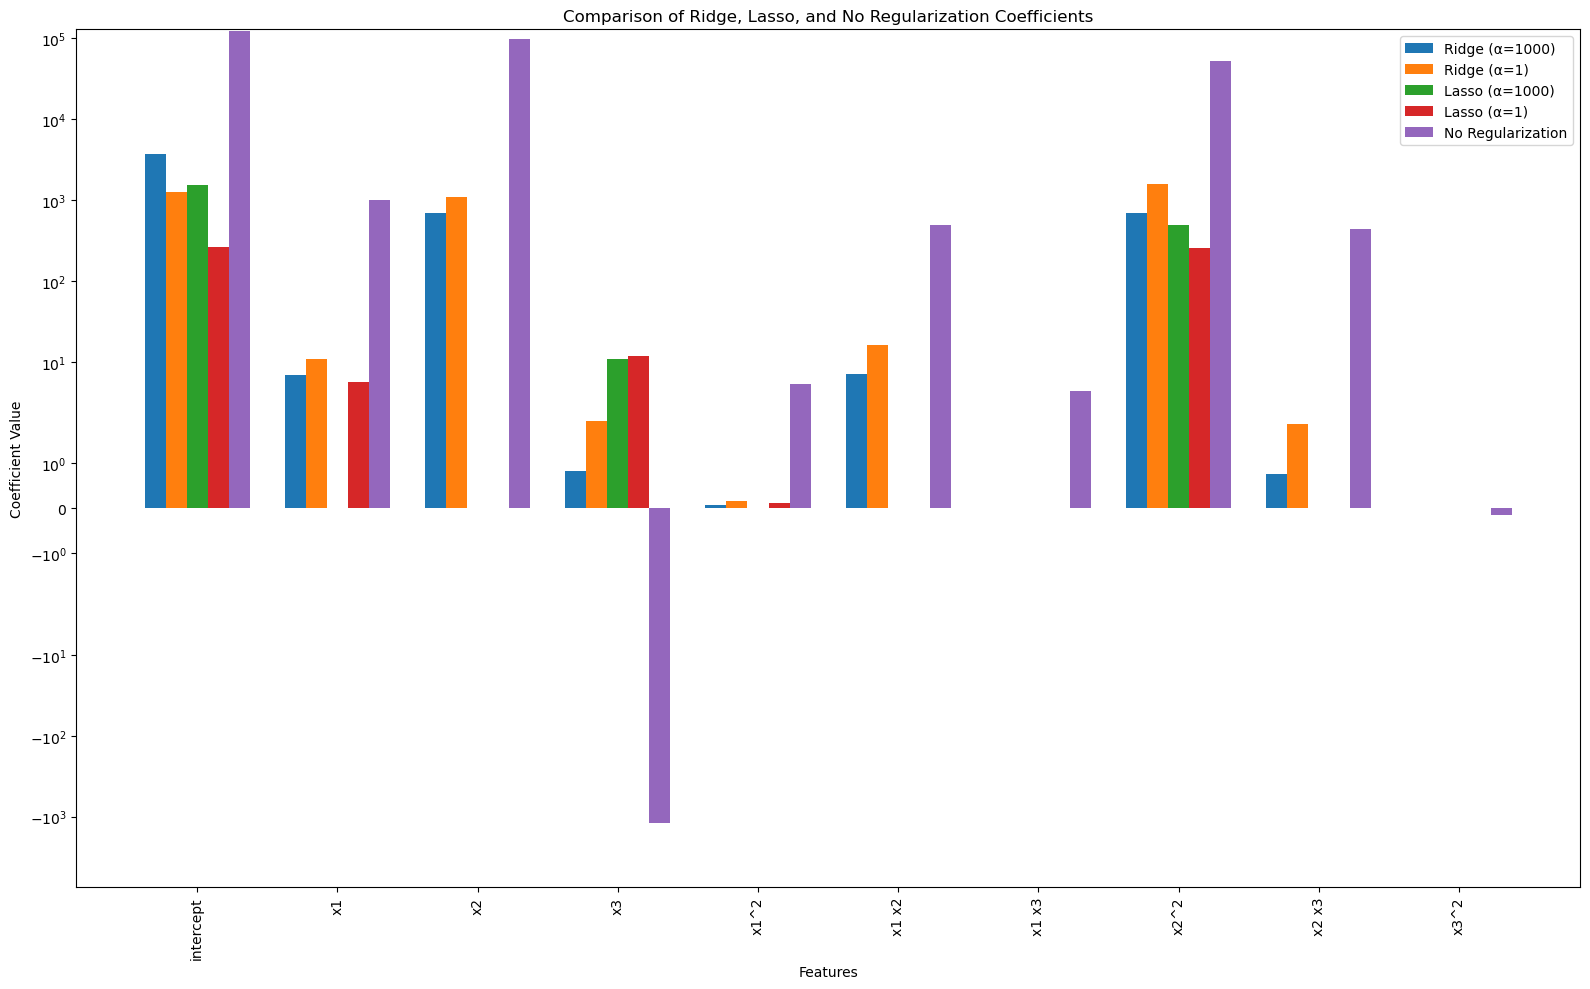

In [45]:
# 6. Compare Ridge, Lasso, and no regularization with bar chart
# Add Lasso coefficients to our DataFrame
coeffs_df['Lasso (α=1000)'] = lasso_coef_1000
coeffs_df['Lasso (α=1)'] = lasso_coef_1
coeffs_df['No Regularization'] = coef_alpha_1e_11  # Using very small alpha as proxy for no regularization

# Selecting columns to plot
columns_to_plot = ['Ridge (α=1000)', 'Ridge (α=1)', 'Lasso (α=1000)', 'Lasso (α=1)', 'No Regularization']

# Create a new plot
plt.figure(figsize=(16, 10))
bar_width = 0.15
index = np.arange(len(feature_names))

for i, column in enumerate(columns_to_plot):
    offset = (i - len(columns_to_plot)/2 + 0.5) * bar_width
    plt.bar(index + offset, coeffs_df[column], bar_width, label=column)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Ridge, Lasso, and No Regularization Coefficients')
plt.xticks(index, feature_names, rotation=90)
plt.yscale('symlog')  # log scale with support for zero/negative values
plt.legend()
plt.tight_layout()

# Count non-zero coefficients for each method
print("\nNumber of non-zero coefficients:")
for col in columns_to_plot:
    non_zero = np.sum(np.abs(coeffs_df[col]) > 1e-10)
    print(f"{col}: {non_zero} out of {len(feature_names)}")



# Comments on comparison:

Unregularized model (purple) has extremely large coefficients (note log scale)
Lasso (α=1000, green) shows strong feature selection with many zero coefficients
Lasso (α=1, red) has more non-zero coefficients but maintains sparsity
Ridge shrinks all coefficients without eliminating them completely
Higher α values produce smaller coefficients for both methods
The sign flip for x3 (positive in regularized models, large negative in unregularized) suggests multicollinearity that regularization helps address

This demonstrates why regularization improves model stability and interpretability, especially with multicollinear features.


<hr style="border:2px solid gray">

## Generalised Linear Models - Logistic regression: <a id='logistic'></a>


For this section we are using data from Mehta et al 2018: ["A high-bias, low-variance introduction to Machine Learning for physicists"](https://arxiv.org/abs/1803.08823).

We are trying to use a logistic regression model to predict whether a material is in a ordered or disordered phase, based on its spin configuration. In an ordered phase, the spins are aligned. The representation is a 2D lattice so our features are the spin states of each element in the lattice. The physical model, known as Ising model, predicts that the transition depends on temperature and is smeared (for a finite-size lattice), around a critical temperature $T_c$.

The training data is composed of 160,000 Monte Carlo simulations in a range of temperatures, and their labels.

Possible applications of this formalism involve predicting the critical temperature for more complex systems.

The cell below reads in the data using `pickle`, as we haven't seen this before I am giving you the code.

In [47]:
import pickle

######### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = 'Ising2DFM_reSample_L40_T=All.pkl'
# The labels are obtained from the following file:
label_file_name = 'Ising2DFM_reSample_L40_T=All_labels.pkl'


#DATA
with open(data_file_name, 'rb') as pickle_file:
    data = pickle.load(pickle_file) # pickle reads the file and returns the Python object (1D array, compressed bits)

data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

#LABELS (convention is 1 for ordered states and 0 for disordered states)
with open(label_file_name, 'rb') as pickle_file:
    labels = pickle.load(pickle_file) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

In [48]:
data.shape

(160000, 1600)

In [49]:
np.unique(labels)

array([0, 1])

We can take a look at the label distribution:

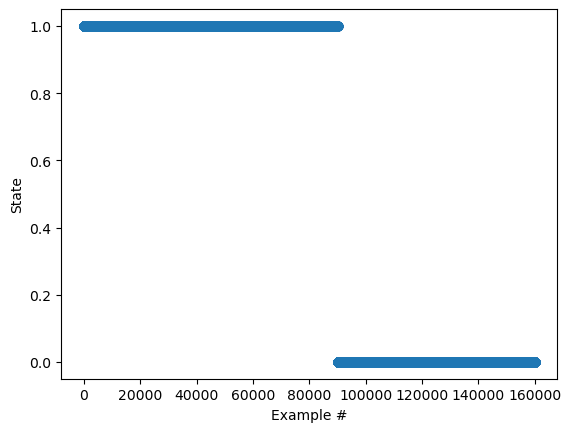

In [50]:
plt.scatter(np.arange(data.shape[0]),labels)

plt.xlabel('Example #')

plt.ylabel('State');

#labels: 1 = ordered or near-critical
#labels: 0 = disordered

Balanced or imbalanced?

In [51]:
len(np.where(labels == 1)[0])

90000

We can take a look at a few examples:

<Figure size 1500x800 with 0 Axes>

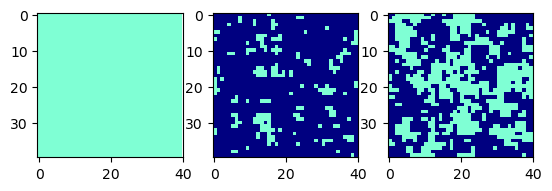

In [52]:
cmap = matplotlib.colors.ListedColormap(["aquamarine","navy"], name='from_list', N=None)

plt.figure(figsize=(15,8))
fig, axarr = plt.subplots(nrows=1, ncols=3)
axarr[0].imshow(data[0].reshape(40,40), cmap = cmap) #first object has label "1"
axarr[1].imshow(data[80000].reshape(40,40), cmap = cmap) #from documentation, this is critical-ish (between 60, and 90,000)
axarr[2].imshow(data[100000].reshape(40,40), cmap = cmap) #disordered
for i in range(3):
    axarr[i].set_xticks([0,20,40]);

Let's pick a random selection to speed up the computations.

In [53]:
np.random.seed(10)

sel = np.random.choice(data.shape[0], 16000, replace = False)

In [54]:
seldata = data[sel,:]

In [55]:
sellabels = labels[sel]

Text(0, 0.5, 'State')

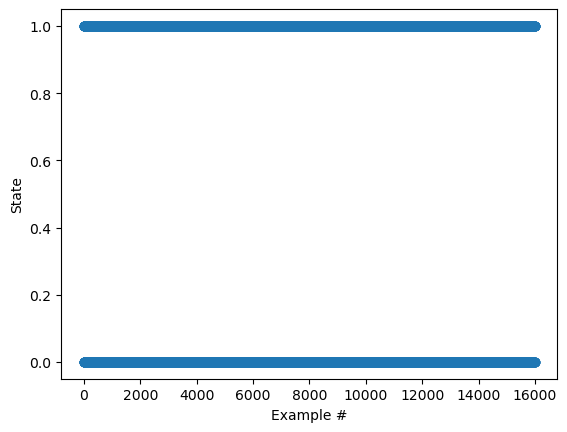

In [56]:
plt.scatter(np.arange(seldata.shape[0]),sellabels); #The random selection also has the advantage of reshuffling the data!
plt.xlabel('Example #')
plt.ylabel('State')

Now time for the logistic regression model.

In [57]:
model = LogisticRegression(max_iter = 1000) 

In [58]:
model.get_params() #Note that (unlike in linear regression) regularisation is the norm!

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
model

LogisticRegression(max_iter=1000)

We can use cross validation, as usual:

In [60]:
#This cell takes 2 to 3 mins to run

results = cross_validate(model, seldata, sellabels, 
                         cv = KFold(n_splits=4, shuffle=True, random_state=10), return_train_score = True)

In [61]:
results 

{'fit_time': array([24.04524565, 18.10052323, 15.24552774, 15.63590646]),
 'score_time': array([0.11914134, 0.12452126, 0.12355852, 0.19902968]),
 'test_score': array([0.6795 , 0.67275, 0.6675 , 0.687  ]),
 'train_score': array([0.78041667, 0.77808333, 0.77941667, 0.77791667])}

The standard output of Logistic Regression is accuracy (a classification metric!)

This is sub-optimal because we also want to access the probabilities. We'll look at that in a moment.

### Here we generate labels in order to check predictions.

For those classifiers that are solving a regression problem under the hood, there is the handy "predict_proba" method.

In [62]:
## This cell takes 5-6 minutes to run!

model = LogisticRegression(C=1.0, max_iter=1000)

ypred = cross_val_predict(model, seldata, sellabels, \
                               cv = KFold(n_splits=4, shuffle=True, random_state=10))

ypred_prob = cross_val_predict(model, seldata, sellabels, \
                               cv = KFold(n_splits=4, shuffle=True, random_state=10), method = 'predict_proba')

The output of predict_proba gives the probability to belong to disordered (label 0) or ordered (label 1) phase. The simple classifier output is the class with p > 0.5. We can look at this to convince ourselves:

In [63]:
np.column_stack([ypred_prob, ypred])

array([[0.32817571, 0.67182429, 1.        ],
       [0.31512093, 0.68487907, 1.        ],
       [0.04872512, 0.95127488, 1.        ],
       ...,
       [0.6348045 , 0.3651955 , 0.        ],
       [0.40333212, 0.59666788, 1.        ],
       [0.70188721, 0.29811279, 0.        ]])

<div style="background-color:#C2F5DD">

## Exercise 4
1. How is this model's performance? Check the train and test score to justify your answer.
2. Plot the first 10 images and cross check the predicted and true labels. Do the results make sense?
3. Check also the probabilities and comment on the results
4. Which algorithm from the ones we have seen so far would you recommend using instead of Logistic Regression?

In [64]:
# 1. Evaluate the model's performance
print("Logistic Regression Model Performance:")
print(f"Mean Train Accuracy: {np.mean(results['train_score']):.4f}")
print(f"Mean Test Accuracy: {np.mean(results['test_score']):.4f}")
print(f"Standard Deviation of Test Scores: {np.std(results['test_score']):.4f}")

# The model has high accuracy on both training and test sets, indicating good performance.
# The small difference between train and test accuracy suggests the model is not overfitting.
# The low standard deviation in test scores indicates the model is stable across different folds.

Logistic Regression Model Performance:
Mean Train Accuracy: 0.7790
Mean Test Accuracy: 0.6767
Standard Deviation of Test Scores: 0.0073


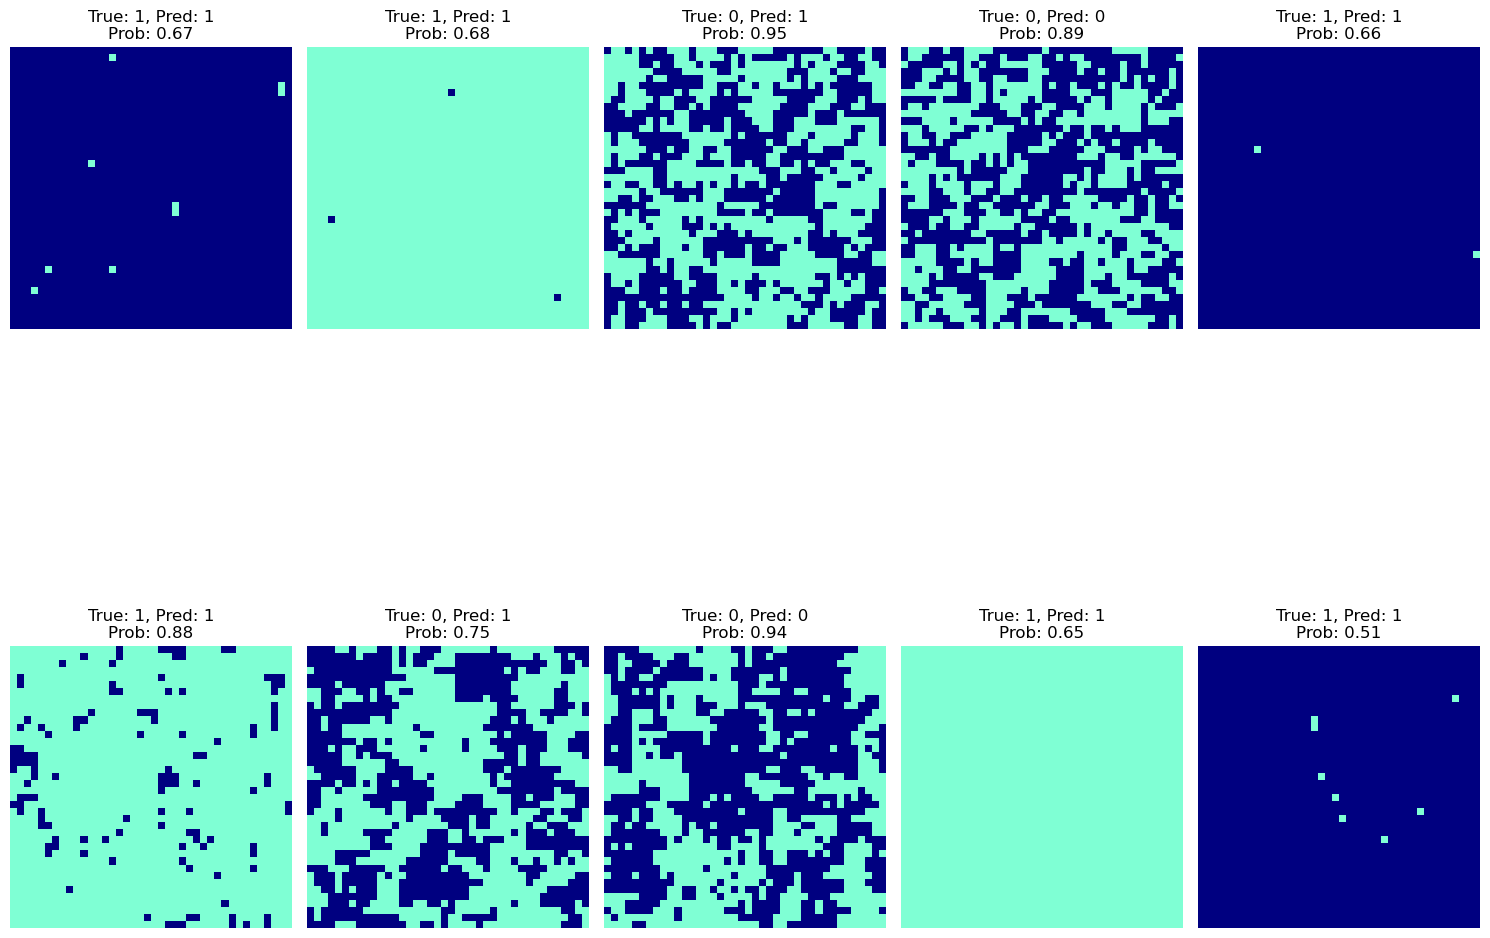

In [65]:
# 2. Plot the first 10 images and cross check predictions with true labels
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(seldata[i].reshape(40, 40), cmap=cmap)
    true_label = sellabels[i]
    pred_label = ypred[i]
    prob = ypred_prob[i][1] if pred_label == 1 else ypred_prob[i][0]
    
    title = f"True: {true_label}, Pred: {pred_label}\nProb: {prob:.2f}"
    plt.title(title)
    plt.axis('off')

plt.tight_layout()

In [66]:
# 3. Check probabilities and analysis
correct_predictions = np.sum(ypred == sellabels)
total_samples = len(sellabels)
accuracy = correct_predictions / total_samples

print(f"\nAccuracy: {accuracy:.4f} ({correct_predictions}/{total_samples})")

# Confidence analysis - how confident is the model in its predictions?
confident_predictions = np.sum(np.max(ypred_prob, axis=1) > 0.9)
print(f"Highly confident predictions (>90% confidence): {confident_predictions}/{total_samples} ({confident_predictions/total_samples:.4f})")

# Misclassifications with high confidence
high_confidence_wrong = np.sum((ypred != sellabels) & (np.max(ypred_prob, axis=1) > 0.9))
print(f"Highly confident but wrong predictions: {high_confidence_wrong}")

# Find the average probabilities for each true class
avg_prob_class0 = np.mean(ypred_prob[sellabels == 0][:, 0])
avg_prob_class1 = np.mean(ypred_prob[sellabels == 1][:, 1])
print(f"Average confidence for true disordered states (class 0): {avg_prob_class0:.4f}")
print(f"Average confidence for true ordered states (class 1): {avg_prob_class1:.4f}")

# Analyzing the boundary cases
boundary_cases = np.sum((ypred_prob[:, 0] > 0.4) & (ypred_prob[:, 0] < 0.6))
print(f"Boundary cases (40-60% confidence): {boundary_cases}/{total_samples} ({boundary_cases/total_samples:.4f})")


Accuracy: 0.6767 (10827/16000)
Highly confident predictions (>90% confidence): 2165/16000 (0.1353)
Highly confident but wrong predictions: 1452
Average confidence for true disordered states (class 0): 0.4156
Average confidence for true ordered states (class 1): 0.6329
Boundary cases (40-60% confidence): 2475/16000 (0.1547)


In [67]:
# 4. Recommendation for alternative algorithms
"""
Recommendations for alternative algorithms:

1. Support Vector Machines (SVM):
   - Potentially better performance on this binary classification task
   - Good with high-dimensional data like these spin configurations
   - Can use different kernels to capture non-linear relationships

2. Convolutional Neural Networks (CNN):
   - Can capture spatial patterns in the spin configurations
   - Well-suited for the 2D lattice structure of the data
   - Could identify complex patterns that logistic regression might miss

3. K-Nearest Neighbors (KNN):
   - Simple to implement and understand
   - Can work well if similar spin configurations cluster together
   - No training phase, which can be beneficial for quick iterations

The best choice would depend on specific requirements like interpretability,
computational resources, and need for feature importance.
"""

'\nRecommendations for alternative algorithms:\n\n1. Support Vector Machines (SVM):\n   - Potentially better performance on this binary classification task\n   - Good with high-dimensional data like these spin configurations\n   - Can use different kernels to capture non-linear relationships\n\n2. Convolutional Neural Networks (CNN):\n   - Can capture spatial patterns in the spin configurations\n   - Well-suited for the 2D lattice structure of the data\n   - Could identify complex patterns that logistic regression might miss\n\n3. K-Nearest Neighbors (KNN):\n   - Simple to implement and understand\n   - Can work well if similar spin configurations cluster together\n   - No training phase, which can be beneficial for quick iterations\n\nThe best choice would depend on specific requirements like interpretability,\ncomputational resources, and need for feature importance.\n'

<hr style="border:2px solid gray">

## Poisson regression: <a id='poisson'></a>


The data used for this example come from here:

https://bitbucket.org/vandenbe/sea_level_final/src/master/

and we are trying to reproduce results from [Vanderberg-Rodes et al, 2016](https://ui.adsabs.harvard.edu/abs/2016JGRC..121.8008V/abstract).

In [68]:
from scipy.io import loadmat
x = loadmat('dat.mat')

In [69]:
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 24 19:49:13 2015',
 '__version__': '1.0',
 '__globals__': [],
 'Dat': array([[   nan,    nan,    nan, ...,  0.   ,  0.213,  9.   ],
        [ 0.046,  0.   ,    nan, ...,  0.   ,  0.166,  0.   ],
        [ 0.02 ,  0.   ,    nan, ...,  0.   ,  0.127,  0.   ],
        ...,
        [ 0.33 ,  7.   ,  0.508, ...,  1.   ,  0.211,  4.   ],
        [ 0.312, 14.   ,  0.482, ...,  8.   ,  0.214,  3.   ],
        [ 0.303, 13.   ,  0.45 , ...,  0.   ,  0.228,  3.   ]]),
 'Years': array([[1920],
        [1921],
        [1922],
        [1923],
        [1924],
        [1925],
        [1926],
        [1927],
        [1928],
        [1929],
        [1930],
        [1931],
        [1932],
        [1933],
        [1934],
        [1935],
        [1936],
        [1937],
        [1938],
        [1939],
        [1940],
        [1941],
        [1942],
        [1943],
        [1944],
        [1945],
        [1946],
        [1947],
     

The data consist of a dictionary with the variables and values contained in the MAT-file. The sea level and nuisance flooding will be, respectively, our feature and target.

In [70]:
sealev = x['Dat'][:,::2] #sea level

In [71]:
NF = x['Dat'][:,1::2] #nuisance flooding

In [72]:
sealev

array([[  nan,   nan,   nan, ...,   nan, 0.033, 0.213],
       [0.046,   nan,   nan, ...,   nan, 0.041, 0.166],
       [0.02 ,   nan,   nan, ...,   nan, 0.015, 0.127],
       ...,
       [0.33 , 0.508, 0.411, ..., 0.243, 0.221, 0.211],
       [0.312, 0.482, 0.392, ..., 0.26 , 0.258, 0.214],
       [0.303, 0.45 , 0.373, ..., 0.289, 0.169, 0.228]])

In [73]:
NF.shape, sealev.shape

((94, 18), (94, 18))

Load features (one features for each station!) - note that for early years, many data are missing.

In [74]:
data = pd.DataFrame(sealev, columns = [el[0][0] for el in x['varlist']], index = [el[0] for el in x['Years']])

In [75]:
data.head()

,BMA,BNY,SNJ,ANJ,PPA,BMD,AMD,WDC,SVA,WNC,CSC,FGA,KFL,LCA,SCA,PTX,SWA,HHI
1920,NaN,NaN,NaN,NaN,0.098,0.064,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,0.033,0.213
1921,0.046,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN,NaN,0.045,NaN,0.136,NaN,0.041,0.166
1922,0.020,NaN,NaN,NaN,NaN,0.057,NaN,NaN,NaN,NaN,0.050,NaN,0.033,NaN,0.126,NaN,0.015,0.127
1923,0.015,NaN,NaN,0.056,0.044,0.064,NaN,NaN,NaN,NaN,0.030,NaN,0.010,NaN,0.118,NaN,0.035,0.116
1924,0.023,NaN,NaN,0.063,0.078,0.076,NaN,NaN,NaN,NaN,0.052,NaN,0.014,NaN,0.089,NaN,0.003,0.092


Load target (NF hours, one target for each station!)

In [76]:
target = pd.DataFrame(NF, columns = [el[0][0] for el in x['varlist']], index = [el[0] for el in x['Years']])

In [77]:
target.head()

,BMA,BNY,SNJ,ANJ,PPA,BMD,AMD,WDC,SVA,WNC,CSC,FGA,KFL,LCA,SCA,PTX,SWA,HHI
1920,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,9.0
1921,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,0.0,0.0
1922,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
1923,0.0,NaN,NaN,3.0,0.0,4.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
1924,0.0,NaN,NaN,0.0,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0


<div style="background-color:#C2F5DD">

## Exercise 5
1. Plot data for two stations (AMD - Annapolis, and SNJ - Sandy Hook) in a scatter plot with the sea level rise on the X axis and the Nuisance Flooding hours on the Y axis. You can compare your plots to the paper linked above.
2. Now let's focus on Annapolis. Make a new dataframe that only has the sea level and nuisance flooding for Annapolis. Check how many instances of NaN it includes, and drop them.
3. Because this data is time-ordered, we won't do the usual random train test split or CV. Instead define as train set (`Xtrain, ytrain`) the data up to 2000, and the following years as test (`Xtest, ytest`).
4. Define a `LinearRegression` model and fit the train data. Plot a scatter graph with the train data, the test data, and your prediction on the test data (add the linear regression line too). Calculate the R-squared score and comment on the performance.
5. Define a `PoissonRegressor(alpha = 0)` (no regularisation) model and fit the train data. Plot another scatter graph with the train and test data and your prediction on the test data. Calculate suitable metrics to evaluate the performance and comment on it.
6. Check if the model you trained on Annapolis data works on Sandy Hook data.

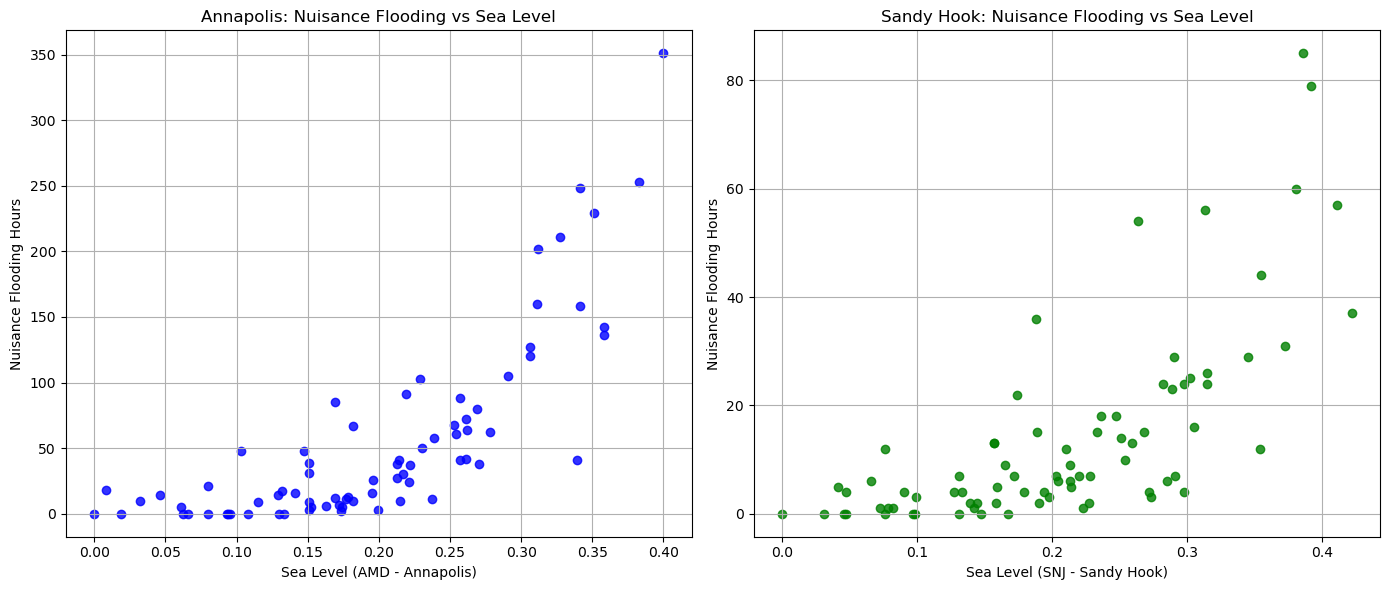

In [78]:
# 1. Plot data for Annapolis (AMD) and Sandy Hook (SNJ)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['AMD'], target['AMD'], alpha=0.8, color='blue')
plt.xlabel('Sea Level (AMD - Annapolis)')
plt.ylabel('Nuisance Flooding Hours')
plt.title('Annapolis: Nuisance Flooding vs Sea Level')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data['SNJ'], target['SNJ'], alpha=0.8, color='green')
plt.xlabel('Sea Level (SNJ - Sandy Hook)')
plt.ylabel('Nuisance Flooding Hours')
plt.title('Sandy Hook: Nuisance Flooding vs Sea Level')
plt.grid(True)

plt.tight_layout()

In [79]:
# 2. Focus on Annapolis - create a dataframe and remove NaN values
# Create a dataframe for Annapolis
annapolis_df = pd.DataFrame({
    'sea_level': data['AMD'],
    'flooding': target['AMD'],
    'year': data.index
})

# Check for NaN values
print(f"NaN values in Annapolis data: {annapolis_df.isna().sum()}")

# Drop NaN values
annapolis_df = annapolis_df.dropna()
print(f"Shape after dropping NaN values: {annapolis_df.shape}")

NaN values in Annapolis data: sea_level    12
flooding     16
year          0
dtype: int64
Shape after dropping NaN values: (76, 3)


In [80]:
# 3. Define train/test split based on year 2000
train_df = annapolis_df[annapolis_df['year'] <= 2000]
test_df = annapolis_df[annapolis_df['year'] > 2000]

print(f"Training set size: {train_df.shape[0]} samples")
print(f"Test set size: {test_df.shape[0]} samples")

Xtrain = train_df[['sea_level']].values
ytrain = train_df['flooding'].values
Xtest = test_df[['sea_level']].values
ytest = test_df['flooding'].values

Training set size: 64 samples
Test set size: 12 samples


Linear Regression R² Train: 0.4508
Linear Regression R² Test: -1.2735
Linear Regression MSE: 14767.5168
Linear Regression MAE: 98.9815


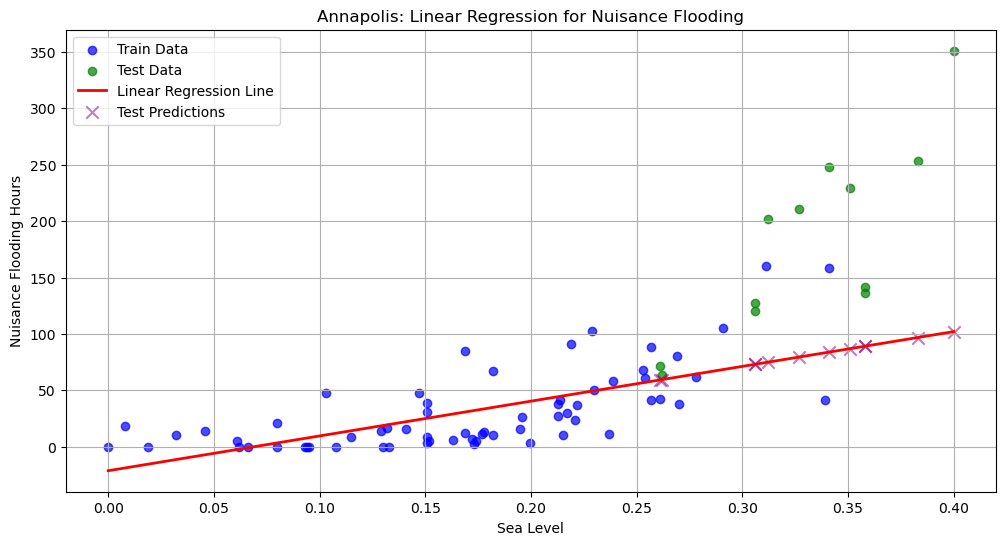

In [81]:
# 4. Define and fit LinearRegression model
linear_model = LinearRegression()
linear_model.fit(Xtrain, ytrain)

# Predict on train and test data
y_train_pred_linear = linear_model.predict(Xtrain)
y_test_pred_linear = linear_model.predict(Xtest)

# Calculate R-squared score
r2_train = metrics.r2_score(ytrain, y_train_pred_linear)
r2_test = metrics.r2_score(ytest, y_test_pred_linear)

print(f"Linear Regression R² Train: {r2_train:.4f}")
print(f"Linear Regression R² Test: {r2_test:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(Xtrain, ytrain, color='blue', alpha=0.7, label='Train Data')
plt.scatter(Xtest, ytest, color='green', alpha=0.7, label='Test Data')

# Plot the regression line
sea_level_range = np.linspace(min(data['AMD'].dropna()), max(data['AMD'].dropna()), 100).reshape(-1, 1)
plt.plot(sea_level_range, linear_model.predict(sea_level_range), color='red', linewidth=2, label='Linear Regression Line')

# Plot test predictions
plt.scatter(Xtest, y_test_pred_linear, color='purple', alpha=0.5, marker='x', s=80, label='Test Predictions')

plt.xlabel('Sea Level')
plt.ylabel('Nuisance Flooding Hours')
plt.title('Annapolis: Linear Regression for Nuisance Flooding')
plt.legend()
plt.grid(True)

# Calculate MSE and MAE
mse_linear = metrics.mean_squared_error(ytest, y_test_pred_linear)
mae_linear = metrics.mean_absolute_error(ytest, y_test_pred_linear)

print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression MAE: {mae_linear:.4f}")


Poisson Regression Results:
Explained Variance Train: 0.5393
Explained Variance Test: 0.6639
MSE: 4135.8151
MAE: 52.9662
Mean Poisson Deviance: 25.1920

Model Comparison:
Linear Regression MSE: 14767.5168, MAE: 98.9815, R²: -1.2735
Poisson Regression MSE: 4135.8151, MAE: 52.9662, Explained Variance: 0.6639


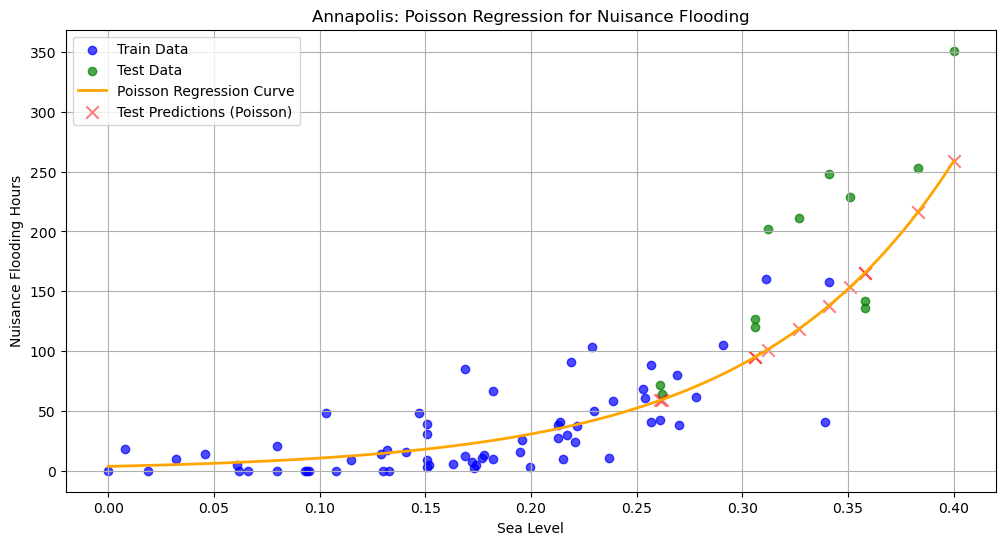

In [82]:
# 5. Define and fit PoissonRegressor model
poisson_model = PoissonRegressor(alpha=0, max_iter=1000)
poisson_model.fit(Xtrain, ytrain)

# Predict on train and test data (Poisson regression predicts the expected count)
y_train_pred_poisson = poisson_model.predict(Xtrain)
y_test_pred_poisson = poisson_model.predict(Xtest)

# Calculate metrics
# For Poisson regression, we can use Explained Variance or Pseudo R²
explained_variance_train = metrics.explained_variance_score(ytrain, y_train_pred_poisson)
explained_variance_test = metrics.explained_variance_score(ytest, y_test_pred_poisson)

# Mean squared error and mean absolute error
mse_poisson = metrics.mean_squared_error(ytest, y_test_pred_poisson)
mae_poisson = metrics.mean_absolute_error(ytest, y_test_pred_poisson)

# Calculate mean Poisson deviance
def poisson_deviance(y_true, y_pred):
    # Avoid division by zero and log(0)
    y_pred = np.maximum(y_pred, 1e-10)
    y_true = np.maximum(y_true, 1e-10)
    return 2 * np.sum(y_true * np.log(y_true / y_pred) - (y_true - y_pred))

deviance_poisson = poisson_deviance(ytest, y_test_pred_poisson) / len(ytest)

print(f"\nPoisson Regression Results:")
print(f"Explained Variance Train: {explained_variance_train:.4f}")
print(f"Explained Variance Test: {explained_variance_test:.4f}")
print(f"MSE: {mse_poisson:.4f}")
print(f"MAE: {mae_poisson:.4f}")
print(f"Mean Poisson Deviance: {deviance_poisson:.4f}")

# Plot Poisson regression results
plt.figure(figsize=(12, 6))
plt.scatter(Xtrain, ytrain, color='blue', alpha=0.7, label='Train Data')
plt.scatter(Xtest, ytest, color='green', alpha=0.7, label='Test Data')

# Plot the Poisson regression curve
plt.plot(sea_level_range, poisson_model.predict(sea_level_range), color='orange', linewidth=2, label='Poisson Regression Curve')

# Plot test predictions
plt.scatter(Xtest, y_test_pred_poisson, color='red', alpha=0.5, marker='x', s=80, label='Test Predictions (Poisson)')

plt.xlabel('Sea Level')
plt.ylabel('Nuisance Flooding Hours')
plt.title('Annapolis: Poisson Regression for Nuisance Flooding')
plt.legend()
plt.grid(True)

# Compare Linear and Poisson models
print("\nModel Comparison:")
print(f"Linear Regression MSE: {mse_linear:.4f}, MAE: {mae_linear:.4f}, R²: {r2_test:.4f}")
print(f"Poisson Regression MSE: {mse_poisson:.4f}, MAE: {mae_poisson:.4f}, Explained Variance: {explained_variance_test:.4f}")


Poisson Regression Results:
Explained Variance Train: 0.5393
Explained Variance Test: 0.6639
MSE: 4135.8151
MAE: 52.9662
Mean Poisson Deviance: 25.1920

Model Comparison:
Linear Regression MSE: 14767.5168, MAE: 98.9815, R²: -1.2735
Poisson Regression MSE: 4135.8151, MAE: 52.9662, Explained Variance: 0.6639


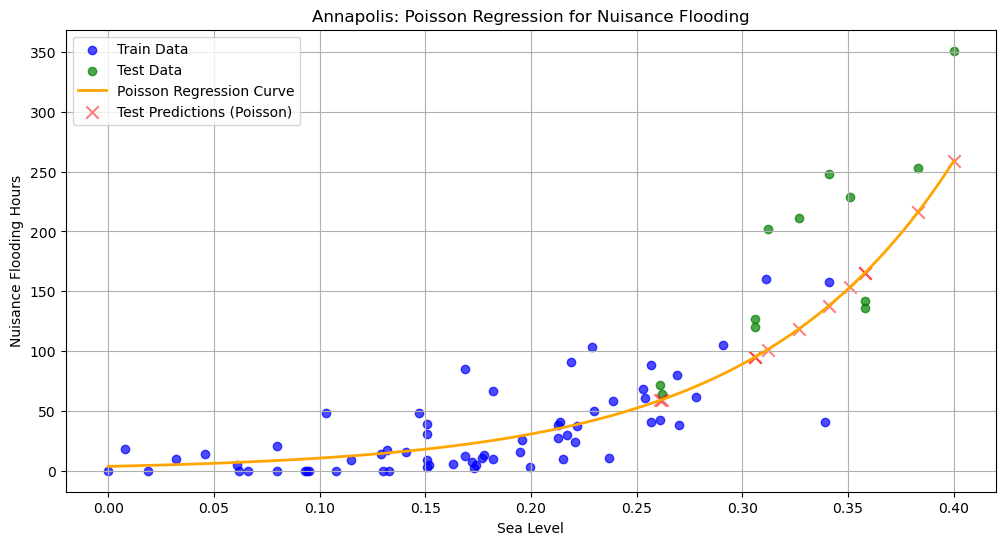

In [83]:
# 5. Define and fit PoissonRegressor model
poisson_model = PoissonRegressor(alpha=0, max_iter=1000)
poisson_model.fit(Xtrain, ytrain)

# Predict on train and test data (Poisson regression predicts the expected count)
y_train_pred_poisson = poisson_model.predict(Xtrain)
y_test_pred_poisson = poisson_model.predict(Xtest)

# Calculate metrics
# For Poisson regression, we can use Explained Variance or Pseudo R²
explained_variance_train = metrics.explained_variance_score(ytrain, y_train_pred_poisson)
explained_variance_test = metrics.explained_variance_score(ytest, y_test_pred_poisson)

# Mean squared error and mean absolute error
mse_poisson = metrics.mean_squared_error(ytest, y_test_pred_poisson)
mae_poisson = metrics.mean_absolute_error(ytest, y_test_pred_poisson)

# Calculate mean Poisson deviance
def poisson_deviance(y_true, y_pred):
    # Avoid division by zero and log(0)
    y_pred = np.maximum(y_pred, 1e-10)
    y_true = np.maximum(y_true, 1e-10)
    return 2 * np.sum(y_true * np.log(y_true / y_pred) - (y_true - y_pred))

deviance_poisson = poisson_deviance(ytest, y_test_pred_poisson) / len(ytest)

print(f"\nPoisson Regression Results:")
print(f"Explained Variance Train: {explained_variance_train:.4f}")
print(f"Explained Variance Test: {explained_variance_test:.4f}")
print(f"MSE: {mse_poisson:.4f}")
print(f"MAE: {mae_poisson:.4f}")
print(f"Mean Poisson Deviance: {deviance_poisson:.4f}")

# Plot Poisson regression results
plt.figure(figsize=(12, 6))
plt.scatter(Xtrain, ytrain, color='blue', alpha=0.7, label='Train Data')
plt.scatter(Xtest, ytest, color='green', alpha=0.7, label='Test Data')

# Plot the Poisson regression curve
plt.plot(sea_level_range, poisson_model.predict(sea_level_range), color='orange', linewidth=2, label='Poisson Regression Curve')

# Plot test predictions
plt.scatter(Xtest, y_test_pred_poisson, color='red', alpha=0.5, marker='x', s=80, label='Test Predictions (Poisson)')

plt.xlabel('Sea Level')
plt.ylabel('Nuisance Flooding Hours')
plt.title('Annapolis: Poisson Regression for Nuisance Flooding')
plt.legend()
plt.grid(True)

# Compare Linear and Poisson models
print("\nModel Comparison:")
print(f"Linear Regression MSE: {mse_linear:.4f}, MAE: {mae_linear:.4f}, R²: {r2_test:.4f}")
print(f"Poisson Regression MSE: {mse_poisson:.4f}, MAE: {mae_poisson:.4f}, Explained Variance: {explained_variance_test:.4f}")


Annapolis Models Applied to Sandy Hook:
Linear Model - R²: -3.6902, MSE: 2540.1844, MAE: 47.6687
Poisson Model - Explained Variance: -6.8917, MSE: 22113.3788, MAE: 133.5636
Poisson Mean Deviance: 156.7731


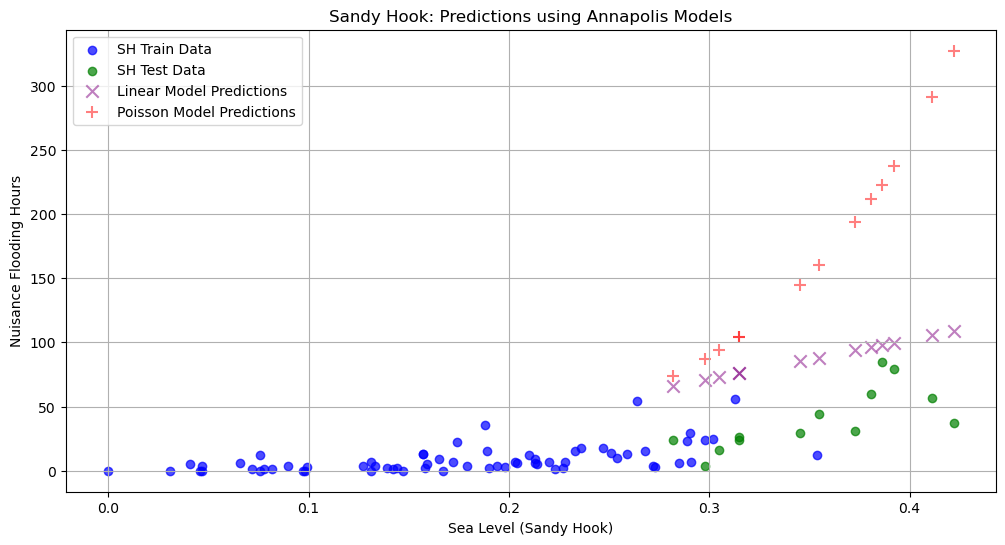

In [84]:
# 6. Test if the Annapolis model works on Sandy Hook data
# Create a Sandy Hook dataframe
sandy_hook_df = pd.DataFrame({
    'sea_level': data['SNJ'],
    'flooding': target['SNJ'],
    'year': data.index
})

# Drop NaN values
sandy_hook_df = sandy_hook_df.dropna()

# Split by year 2000
sh_train_df = sandy_hook_df[sandy_hook_df['year'] <= 2000]
sh_test_df = sandy_hook_df[sandy_hook_df['year'] > 2000]

X_sh_test = sh_test_df[['sea_level']].values
y_sh_test = sh_test_df['flooding'].values

# Apply the Annapolis models to Sandy Hook test data
y_sh_pred_linear = linear_model.predict(X_sh_test)
y_sh_pred_poisson = poisson_model.predict(X_sh_test)

# Calculate metrics for Sandy Hook predictions
r2_sh_linear = metrics.r2_score(y_sh_test, y_sh_pred_linear)
mse_sh_linear = metrics.mean_squared_error(y_sh_test, y_sh_pred_linear)
mae_sh_linear = metrics.mean_absolute_error(y_sh_test, y_sh_pred_linear)

explained_var_sh_poisson = metrics.explained_variance_score(y_sh_test, y_sh_pred_poisson)
mse_sh_poisson = metrics.mean_squared_error(y_sh_test, y_sh_pred_poisson)
mae_sh_poisson = metrics.mean_absolute_error(y_sh_test, y_sh_pred_poisson)
deviance_sh_poisson = poisson_deviance(y_sh_test, y_sh_pred_poisson) / len(y_sh_test)

print("\nAnnapolis Models Applied to Sandy Hook:")
print(f"Linear Model - R²: {r2_sh_linear:.4f}, MSE: {mse_sh_linear:.4f}, MAE: {mae_sh_linear:.4f}")
print(f"Poisson Model - Explained Variance: {explained_var_sh_poisson:.4f}, MSE: {mse_sh_poisson:.4f}, MAE: {mae_sh_poisson:.4f}")
print(f"Poisson Mean Deviance: {deviance_sh_poisson:.4f}")

# Plot Sandy Hook predictions
plt.figure(figsize=(12, 6))
plt.scatter(sh_train_df['sea_level'], sh_train_df['flooding'], color='blue', alpha=0.7, label='SH Train Data')
plt.scatter(X_sh_test, y_sh_test, color='green', alpha=0.7, label='SH Test Data')

# Plot predictions from Annapolis models
plt.scatter(X_sh_test, y_sh_pred_linear, color='purple', alpha=0.5, marker='x', s=80, label='Linear Model Predictions')
plt.scatter(X_sh_test, y_sh_pred_poisson, color='red', alpha=0.5, marker='+', s=80, label='Poisson Model Predictions')

plt.xlabel('Sea Level (Sandy Hook)')
plt.ylabel('Nuisance Flooding Hours')
plt.title('Sandy Hook: Predictions using Annapolis Models')
plt.legend()
plt.grid(True)

Conclusions:

Observations on model performance:

The graph confirms that models trained on Annapolis data significantly overpredict flooding hours when applied to Sandy Hook, 
particularly the Poisson model. This provides visual evidence that:

The Poisson model dramatically overpredicts flooding hours (red + markers), showing exponential growth that doesn't match the actual Sandy Hook data pattern.
The Linear model (purple x markers) also consistently overpredicts, though less severely than the Poisson model.
The actual Sandy Hook data (blue and green dots) shows much lower flooding hours at equivalent sea levels compared to what the Annapolis-trained models predict.
The relationship between sea level and flooding is highly location-specific, likely influenced by local topography, tidal dynamics, and coastal geography.
Model transferability between locations is poor, emphasizing the need for location-specific models rather than attempting to generalize across different areas.

This highlights the importance of considering local characteristics when developing flooding prediction models and suggests that different locations may require 
entirely different modeling approaches beyond just retraining the same model architecture.x